<a href="https://colab.research.google.com/github/juancferreyrar/CISSandboxAnalytics2023-2024/blob/main/PythonSandboxAnalysis_Spring2023_Spring_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CIS Sandbox Fall 2023-Spring 2024 Data Analysis
By: Juan Carlos Ferreyra


*Importing* the Data


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("CIS Sandbox Spring 2023-2024 Scan-In (Responses).xlsx") # import the data


df = df[['Timestamp', 'Your Name', 'Where are you?', 'Course', 'Tutor / Reason']]

Check For Nulls


In [ ]:
#Check for any null values
print(df.isnull().sum())

Timestamp          0
Your Name          5
Where are you?    12
Course             4
Tutor / Reason     0
dtype: int64


Verify Data Is Correct By Checking First and Last 10 Records

In [ ]:
df.head(10)

,Timestamp,Your Name,Where are you?,Course,Tutor / Reason
0,2023-01-26 18:29:50,Jaidhar,In Person,CS 100 - Solving Business Problems with IT,Other
1,2023-01-27 09:31:31,Lijuan zheng,In Person,CS 100 - Solving Business Problems with IT,Other
2,2023-01-27 09:34:40,Alex,In Person,CS 100 - Solving Business Problems with IT,Tomas Hahn
3,2023-01-29 17:03:33,Alejandro Urruela,Online,CS 100 - Solving Business Problems with IT,Tomas Hahn
4,2023-01-30 09:31:57,Olivier Charles Widmer,In Person,CS 100 - Solving Business Problems with IT,Ryan Dancoes
5,2023-01-30 10:56:33,Kasey Nguyen,In Person,CS 100 - Solving Business Problems with IT,Cem Ozsumer
6,2023-01-30 12:24:12,Antonella Martinez,In Person,CS 150 - Data Reporting and Retrieval,Cem Ozsumer
7,2023-01-30 12:29:35,Arnav,In Person,CS 180 - Intro Programming with Java,Cem Ozsumer
8,2023-01-30 13:58:35,Sun Ma,In Person,CS 100 - Solving Business Problems with IT,Tomas Hahn
9,2023-01-30 15:28:59,Siyu Jia,In Person,CS 100 - Solving Business Problems with IT,David D'Augelli


In [ ]:
df.tail(10)

,Timestamp,Your Name,Where are you?,Course,Tutor / Reason
2611,2024-03-05 13:51:27,Cristina Urrea,NaN,CS 150 - Data Reporting and Retrieval,Colin Minarik
2612,2024-03-05 14:07:02,Thomas Merkle,In Person,CS 100 - Solving Business Problems with IT,Abigail Carnes
2613,2024-03-05 15:24:12,Maya Terzi,In Person,CS 100 - Solving Business Problems with IT,David Menache
2614,2024-03-05 16:11:54,Cristina Urrea,In Person,CS 150 - Data Reporting and Retrieval,Ashlyn Bernard
2615,2024-03-05 16:38:12,Laura Bernard-Sasges,In Person,I'm not here for help with a course.,Jesus Bautista
2616,2024-03-05 16:47:31,Yianni Ioannou,In Person,CS 100 - Solving Business Problems with IT,Gabriel Ferrera
2617,2024-03-05 17:15:59,Izabell Tenekedzhyan,In Person,CS 100 - Solving Business Problems with IT,Gabriel Ferrera
2618,2024-03-05 17:33:09,Chiara Lazzerini,In Person,CS 150 - Data Reporting and Retrieval,Ashlyn Bernard
2619,2024-03-05 17:53:36,Kathleen Haddad,In Person,I'm not here for help with a course.,Eli Blouin
2620,2024-03-05 19:02:12,Amelia David,In Person,CS 100 - Solving Business Problems with IT,Juan Carlos Ferreyra


Data Manipulation involves removing null values, and adding columns for days of the week

In [ ]:
print(df.isnull().sum())

Timestamp          0
Your Name          5
Where are you?    12
Course             4
Tutor / Reason     0
dtype: int64


In [ ]:

df = df[(df['Tutor / Reason'] != "Jumpstart Session") & (df['Tutor / Reason'] != "Topics in Tech")]

dropped_rows = df[df.isnull().any(axis=1)]

df.dropna(inplace=True)


print("Dropped Rows:")
print(dropped_rows)

Dropped Rows:
                   Timestamp         Your Name Where are you?  \
314  2023-03-06 13:23:55.000      Mitra Safari            NaN   
368  2023-03-09 16:13:38.000               NaN            NaN   
1067 2023-10-12 13:23:39.000               NaN            NaN   
1465 2023-03-06 13:23:55.000      Mitra Safari            NaN   
1519 2023-03-09 16:13:38.000               NaN            NaN   
1834 2023-03-06 13:23:54.849      Mitra Safari            NaN   
1888 2023-03-09 16:13:37.668               NaN            NaN   
2426 2024-02-12 13:34:38.000         Ava Barry            NaN   
2434 2024-02-14 13:48:46.000  Andrea Rodriguez            NaN   
2500 2024-02-22 15:21:16.000          Cristina            NaN   
2555 2024-02-28 15:00:37.000               NaN      In Person   
2584 2024-03-01 12:35:48.000          Jennifer            NaN   
2611 2024-03-05 13:51:27.000    Cristina Urrea            NaN   

                                              Course            Tutor / Rea

<ipython-input-14-2d0652cfac65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Verify any null Values

In [ ]:
print(df.isnull().sum())

Timestamp         0
Your Name         0
Where are you?    0
Course            0
Tutor / Reason    0
Year              0
Month             0
Day               0
Hour              0
Day_of_Week_N     0
Day_Type          0
Day_of_Week       0
dtype: int64


The next step is to simplify the column name. Simplifying columns by reducing course lenght (for graphing)
Note:New classes like CS 370 Machine Learning and CS 250 AI are added (did not exist in spring 2023)



In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour

df['Day_of_Week_N'] = df['Timestamp'].dt.dayofweek

day_type = {
    0: 'Weekday', # Monday
    1: 'Weekday', # Tuesday
    2: 'Weekday', # Wednesday
    3: 'Weekday', # Thursday
    4: 'Weekday', # Friday
    5: 'Weekend',  # Saturday
    6: 'Weekend'   # Sunday
    }

df['Day_Type'] = df['Day_of_Week_N'].replace(day_type)

course_mapping = {
    'CS 100': 'CS100',
    'CS 150': 'CS150',
    'CS160': 'CS160',
    'CS 180': 'CS180',
    'CS 213': 'CS213',
    'CS 230': 'CS230',
    'CS 240': 'CS240',
    'CS 250' : 'CS250',
    'CS 280': 'CS280',
    'CS 342': 'CS 342',
    'CS 350': 'CS350',
    'CS 360': 'CS360',
    'CS 370': 'CS370',
    'CS 380' : 'CS380',
    'CS 602': 'CS602',
    'CS 605' : 'CS605',
    'CS 650' : 'CS650',
    "I'm not here for help with a course." : 'No Course (Visit)',

}

for key, value in course_mapping.items():
    df.loc[df['Course'].str.contains(key, case=False), 'Course'] = value


date_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
    }

df['Day_of_Week'] = df['Day_of_Week_N'].replace(date_mapping)

df

NameError: name 'pd' is not defined

Plotting and Graphing Number of Students per Course

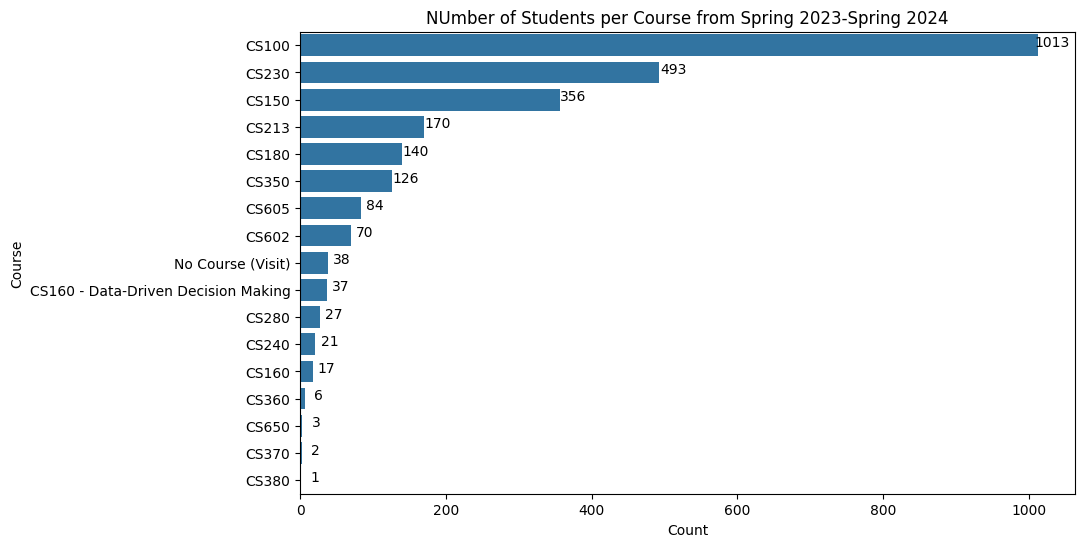

In [ ]:
students_per_class = df['Course'].value_counts()

df_counts = pd.DataFrame({'Course':students_per_class.index,
                          'Count':students_per_class.values})

df_counts = df_counts.sort_values('Count',ascending = False)

plt.figure(figsize=(10,6))
sns_plot = sns.barplot(x='Count',
                       y='Course',
                       data=df_counts,
                       order=df_counts.Course)

plt.title('NUmber of Students per Course from Spring 2023-Spring 2024')

for p in sns_plot.patches:
    sns_plot.annotate(format(p.get_width(), '.0f'),
                   (p.get_width(), p.get_y() + p.get_height() / 1.),
                   ha = 'center',
                   va = 'center',
                   xytext = (10, 10),
                   textcoords = 'offset points')
plt.show()


Text Representation of the Graph

In [ ]:
print(df_counts)

               Course  Count
0               CS100   1017
1               CS230    493
2               CS150    356
3               CS213    170
4               CS180    140
5               CS350    126
6               CS605     84
7               CS602     70
8               CS160     54
9   No Course (Visit)     38
10              CS280     27
11              CS240     21
12              CS360      6
13              CS650      3
14              CS370      2
15              CS380      1


Percentage of Students Visiting for Each Class

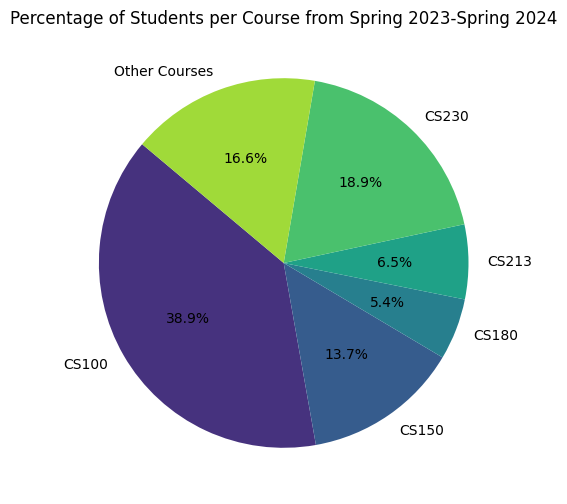

In [ ]:

percentage_per_class = (df['Course'].value_counts() / len(df)) * 100

df_percentage = pd.DataFrame({'Course': percentage_per_class.index,
                              'Percentage': percentage_per_class.values})

threshold = 5
df_percentage.loc[df_percentage['Percentage'] < threshold, 'Course'] = 'Other Courses'
df_percentage = df_percentage.groupby('Course', as_index=False)['Percentage'].sum()

plt.figure(figsize=(10, 6))
plt.pie(df_percentage['Percentage'], labels=df_percentage['Course'], autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=140)
plt.title('Percentage of Students per Course from Spring 2023-Spring 2024')

plt.show()

The 20 Most Popular Students Visiting the Sandbox

In [ ]:
student_visits = df['Your Name'].value_counts()
df_student_counts = pd.DataFrame({'Student':student_visits.index,
                                  'Visits':student_visits.values})
print(df_student_counts.head(20))

              Student  Visits
0         David Evans      62
1          Aaron Gold      32
2       Bridget Maher      31
3        Ethan Ortega      26
4      Kerem Yilmazer      26
5   Mackenzie Bennett      23
6        Vivian Sabga      23
7      Andrene Thomas      23
8      Daelle Guirand      22
9             Amy Lee      21
10      Sidhani Jaggi      18
11          Diya shah      17
12      Linda Benzion      17
13     Ricky McFarren      17
14            Lucy Lu      15
15        Katie Welch      14
16       Jack Keleher      14
17       Matt Tierney      14
18      Adriano Greco      14
19         Liz Soares      14


We must check how effective is our returning rate, meaning how many times students return to the Sandbox, therefore, the amount of students who visitied only once and the percentage of students who only visited once must be explored

In [ ]:

only_once = len(df_student_counts[df_student_counts['Visits'] == 1])
print(f"Number of students that visited only once: {only_once}")
total_students = len(df_student_counts)
percentage_only_once = (only_once / total_students) * 100
print(f"Percentage of students that visited only once: {percentage_only_once:.2f}%")

twice = len(df_student_counts[df_student_counts['Visits'] == 2])
print(f"Number of students that visited at least twice: {twice}")
total_students = len(df_student_counts)
percentage_twice = (twice / total_students) * 100
print(f"Percentage of students that visited onlat least twice: {percentage_twice:.2f}%")

Number of students that visited only once: 309
Percentage of students that visited only once: 37.64%
Number of students that visited at least twice: 195
Percentage of students that visited onlat least twice: 23.75%


We calculate the amount of students each tutor helped individually, including a red (average) line
Note: The "Other" Column is for people inputting "I am not here for any class"

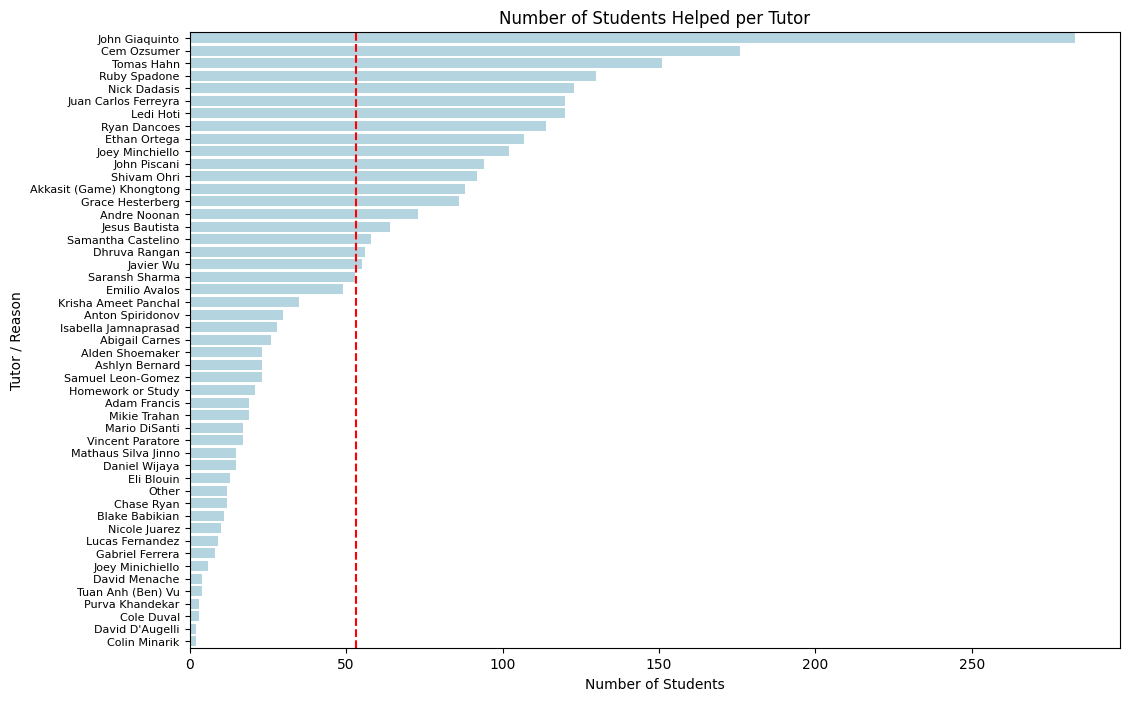

In [ ]:


df_tutor = df.groupby('Tutor / Reason').size().reset_index(name='Count')

df_tutor = df_tutor.sort_values('Count', ascending=False)


mean_count = df_tutor['Count'].mean()


plt.figure(figsize=(12, 8))
sns.barplot(data=df_tutor, x='Count', y='Tutor / Reason', color="lightblue")
plt.axvline(mean_count, color='r', linestyle='--')
plt.title('Number of Students Helped per Tutor')
plt.xlabel('Number of Students')
plt.ylabel('Tutor / Reason')

plt.yticks(fontsize=8)
plt.show()

Finally, we evaluate the most active hours in the CIS Sandbox


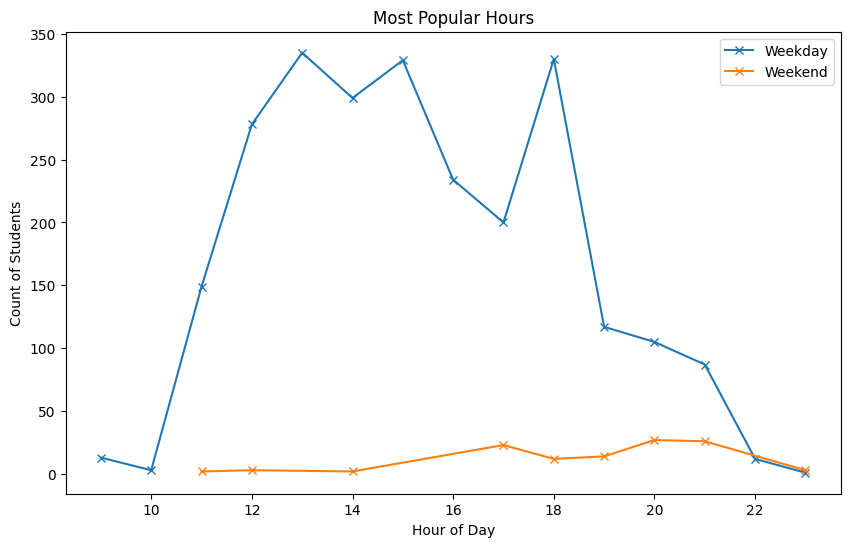

In [ ]:

grouped_df = df.groupby(['Day_Type', 'Hour']).size().reset_index(name='Count')

weekdays_df = grouped_df[grouped_df['Day_Type'] == 'Weekday']
weekend_df = grouped_df[grouped_df['Day_Type'] == 'Weekend']

plt.figure(figsize=(10,6))


plt.plot(weekdays_df['Hour'],
         weekdays_df['Count'],
         label='Weekday',
         marker="x")

plt.plot(weekend_df['Hour'],
         weekend_df['Count'],
         label='Weekend',
         marker="x")

plt.title('Most Popular Hours')

plt.xlabel('Hour of Day')
plt.ylabel('Count of Students')

plt.legend()

plt.show()